# Geopandas and census data
This notebook was originally authored by Yoh Kawano, spatial data scientist extraordinaire in UCLA's Office for Advanced Research Computing. 

If you get into coding, a lot of your work will be trying to learn code and details about code libraries on your own!  I would like you to go through all of the subsequent cells, read them, absorb what the results of the code execution are, and look up any pieces of code that do not make sense.  When you finally make it through, you will be producing plots of spatial census data.

This notebook includes:

- how and where to find and download census data
- use `geopandas` library to read a geojson file
- use `contextily` to add basemaps ([documentation](https://contextily.readthedocs.io/en/latest/intro_guide.html))
- renaming columns
- normalizing data columns
- simple stats
- adding basemaps

## Where to get census data?


Well, you have many options, including getting it directly from the source, the [census bureau website](https://www.census.gov/data.html) itself. We also have, as part of the academic community, a great resource: [Social Explorer](https://www.socialexplorer.com/). With a campus-wide license to have full access to their website, you can download any census variable, that pretty much existed... ever. And, with its easy-to-use user interface, this is a wonderful one-stop shop for your census needs.

But for data scientists, I recommend another source: [censusreporter.org](https://censusreporter.org/)

<a href="https://censusreporter.org" target="_blank"><img src="images/cr.png"></a>

# Data

For the purposes of this assignment, the data is already made available inside the file `data/acs2019_5yr_B03002_14000US06037222001.geojson`

## The libraries

Note: it will be okay to get a warning.

In [1]:
# for general data wrangling tasks
import pandas as pd


# to read and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

## Importing data

In order to work with data in python, we need a library that will let us handle "spatial data exploration." For this notebook, we will use geopandas to read and wrangle a [geojson](https://en.wikipedia.org/wiki/GeoJSON) file.

Before continuing, try taking a little detour to find out how geojson files are constructed:

- [geojson.io](http://geojson.io/#map=2/20.0/0.0)

![geojson](images/geojson.png)

We make the call to load and read the data that was downloaded from census reporter. Take note of the relative path reference to find the file in your file directory.

In [2]:
# load a data file
# note the relative filepath! check where this file is located in your file list at left
gdf = gpd.read_file('acs2019_5yr_B03002_14000US06037222001.geojson')

## Preliminary inspection
A quick look at the size of the data.

In [3]:
gdf.shape

(2347, 45)

In [4]:
gdf.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
0,05000US06037,"Los Angeles County, CA",10081570.0,0.0,5193136.0,0.0,2641770.0,1343.0,790252.0,2958.0,...,567.0,2083135.0,21995.0,174263.0,4915.0,103325.0,3658.0,70938.0,2605.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,443.0,3095.0,354.0,2616.0,306.0,19.0,15.0,...,12.0,383.0,311.0,74.0,52.0,34.0,28.0,40.0,46.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,334.0,3258.0,344.0,2882.0,358.0,74.0,102.0,...,12.0,48.0,55.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,484.0,3731.0,465.0,2986.0,435.0,198.0,165.0,...,17.0,874.0,477.0,81.0,80.0,48.0,62.0,33.0,51.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,276.0,2338.0,236.0,1812.0,271.0,87.0,107.0,...,12.0,497.0,231.0,45.0,42.0,11.0,18.0,34.0,39.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."


<AxesSubplot:>

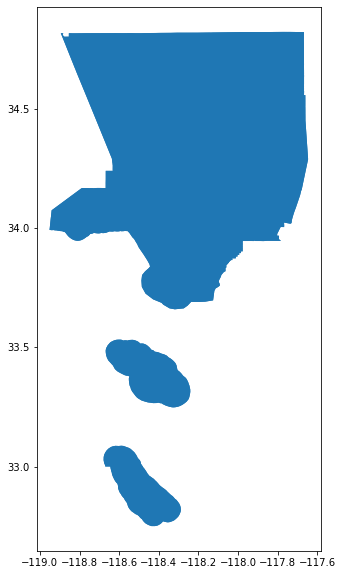

In [7]:
# plot it!
gdf.plot(figsize=(10,10))

In [8]:
gdf.sample()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
1693,14000US06037542601,"Census Tract 5426.01, Los Angeles, CA",3295.0,292.0,648.0,178.0,46.0,46.0,541.0,156.0,...,12.0,1050.0,305.0,53.0,62.0,53.0,62.0,0.0,12.0,"MULTIPOLYGON (((-118.23253 33.90689, -118.2316..."


## Data types

To get the data types, we will use `.info()`. 

In [22]:
# look at the data types
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2347 entries, 0 to 2346
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             2347 non-null   object  
 1   name              2347 non-null   object  
 2   B03002001         2347 non-null   float64 
 3   B03002001, Error  2347 non-null   float64 
 4   B03002002         2347 non-null   float64 
 5   B03002002, Error  2347 non-null   float64 
 6   B03002003         2347 non-null   float64 
 7   B03002003, Error  2347 non-null   float64 
 8   B03002004         2347 non-null   float64 
 9   B03002004, Error  2347 non-null   float64 
 10  B03002005         2347 non-null   float64 
 11  B03002005, Error  2347 non-null   float64 
 12  B03002006         2347 non-null   float64 
 13  B03002006, Error  2347 non-null   float64 
 14  B03002007         2347 non-null   float64 
 15  B03002007, Error  2347 non-null   float64 
 16  B03002008       

### The FIPS code
What is the geoid? It is called a FIPS code but why is it important?

- https://www.census.gov/programs-surveys/geography/guidance/geo-identifiers.html

![fips](images/fips.png)

In [9]:
gdf.geoid.head()

0          05000US06037
1    14000US06037101110
2    14000US06037101122
3    14000US06037101210
4    14000US06037101220
Name: geoid, dtype: object

![fips code](https://learn.arcgis.com/en/related-concepts/GUID-D7AA4FD1-E7FE-49D7-9D11-07915C9ACC68-web.png)

[Source: ESRI](https://learn.arcgis.com/en/related-concepts/united-states-census-geography.htm)

## Delete county row

As we have observed, the first row in the data obtained from censusreporter is for the entire county. Keeping this row is problematic, as it represents a data record that is at a different scale. Let's delete it.

<div class="alert alert-danger">
    <b>Important!</b><hr>
    Note that any data downloaded from censusreporter will have a "summary row" for the entire data.
</div>

In [10]:
# check the data again
gdf.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
0,05000US06037,"Los Angeles County, CA",10081570.0,0.0,5193136.0,0.0,2641770.0,1343.0,790252.0,2958.0,...,567.0,2083135.0,21995.0,174263.0,4915.0,103325.0,3658.0,70938.0,2605.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,443.0,3095.0,354.0,2616.0,306.0,19.0,15.0,...,12.0,383.0,311.0,74.0,52.0,34.0,28.0,40.0,46.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,334.0,3258.0,344.0,2882.0,358.0,74.0,102.0,...,12.0,48.0,55.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,484.0,3731.0,465.0,2986.0,435.0,198.0,165.0,...,17.0,874.0,477.0,81.0,80.0,48.0,62.0,33.0,51.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,276.0,2338.0,236.0,1812.0,271.0,87.0,107.0,...,12.0,497.0,231.0,45.0,42.0,11.0,18.0,34.0,39.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."


In [11]:
# drop the row with index 0 (i.e. the first row)
gdf = gdf.drop([0])

In [12]:
# check to see if it has been deleted
gdf.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,443.0,3095.0,354.0,2616.0,306.0,19.0,15.0,...,12.0,383.0,311.0,74.0,52.0,34.0,28.0,40.0,46.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,334.0,3258.0,344.0,2882.0,358.0,74.0,102.0,...,12.0,48.0,55.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,484.0,3731.0,465.0,2986.0,435.0,198.0,165.0,...,17.0,874.0,477.0,81.0,80.0,48.0,62.0,33.0,51.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,276.0,2338.0,236.0,1812.0,271.0,87.0,107.0,...,12.0,497.0,231.0,45.0,42.0,11.0,18.0,34.0,39.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,394.0,3587.0,363.0,3126.0,359.0,205.0,232.0,...,12.0,45.0,38.0,28.0,32.0,28.0,32.0,0.0,12.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


## The census data dictionary
There are a lot of columns. What are these columns? Column headers are defined in the `metadata.json` file that comes in the dowloaded zipfile from censusreporter. Click the link below to open the json file in another tab.

* [metadata.json](data/metadata.json)

For the purposes of this exercise, we will not choose to analyze subcategories within the Hispanic category, nor will we analyze breakdowns within the multiple race category.  Let's identify which columns are needed, and which are not for our exploration.  


![census variables](images/census1.png)

## Dropping columns 
There are many columns that we do not need. 

- output existing columns as a list
- create a list of columns to keep
- redefine `gdf` with only the columns to keep


In [13]:
list(gdf) # this is the same as df.columns.to_list()

['geoid',
 'name',
 'B03002001',
 'B03002001, Error',
 'B03002002',
 'B03002002, Error',
 'B03002003',
 'B03002003, Error',
 'B03002004',
 'B03002004, Error',
 'B03002005',
 'B03002005, Error',
 'B03002006',
 'B03002006, Error',
 'B03002007',
 'B03002007, Error',
 'B03002008',
 'B03002008, Error',
 'B03002009',
 'B03002009, Error',
 'B03002010',
 'B03002010, Error',
 'B03002011',
 'B03002011, Error',
 'B03002012',
 'B03002012, Error',
 'B03002013',
 'B03002013, Error',
 'B03002014',
 'B03002014, Error',
 'B03002015',
 'B03002015, Error',
 'B03002016',
 'B03002016, Error',
 'B03002017',
 'B03002017, Error',
 'B03002018',
 'B03002018, Error',
 'B03002019',
 'B03002019, Error',
 'B03002020',
 'B03002020, Error',
 'B03002021',
 'B03002021, Error',
 'geometry']

In [14]:
# columns to keep
columns_to_keep = ['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

In [15]:
# redefine gdf with only columns to keep
gdf = gdf[columns_to_keep]

In [16]:
# check the slimmed down gdf
gdf.head()

,geoid,name,B03002001,B03002002,B03002003,B03002004,B03002005,B03002006,B03002007,B03002008,B03002009,B03002012,geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3095.0,2616.0,19.0,3.0,331.0,3.0,8.0,115.0,1188.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,3258.0,2882.0,74.0,15.0,220.0,0.0,0.0,67.0,147.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,3731.0,2986.0,198.0,0.0,486.0,0.0,47.0,14.0,2616.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2338.0,1812.0,87.0,0.0,341.0,0.0,0.0,98.0,1364.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,3587.0,3126.0,205.0,0.0,194.0,0.0,0.0,62.0,297.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


## Renaming columns

Let's rename the columns. First, create a list of column names as they are now.

In [17]:
list(gdf) # this is the same as df.columns.to_list()

['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

Then, simply copy and paste the output list above, and define the columns with it. Replace the values with your desired column names

In [18]:
gdf.columns = ['geoid',
 'name',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry']

In [19]:
gdf.head()

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3095.0,2616.0,19.0,3.0,331.0,3.0,8.0,115.0,1188.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,3258.0,2882.0,74.0,15.0,220.0,0.0,0.0,67.0,147.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,3731.0,2986.0,198.0,0.0,486.0,0.0,47.0,14.0,2616.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2338.0,1812.0,87.0,0.0,341.0,0.0,0.0,98.0,1364.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,3587.0,3126.0,205.0,0.0,194.0,0.0,0.0,62.0,297.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


## Double check your data integrity
Does the math add up? Let's check. The `Total` should equal the rest of the columns.

In [20]:
# get a random record
random_tract = gdf.sample()
random_tract

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
2172,14000US06037900103,"Census Tract 9001.03, Los Angeles, CA",5939.0,2900.0,2178.0,614.0,0.0,25.0,0.0,26.0,57.0,3039.0,"MULTIPOLYGON (((-117.88077 34.62448, -117.8807..."


To get values from individual cells in a dataframe, use the `iloc` command.

- `iloc` ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html))

While there are various methods to get cell values in python, the iloc command allows you to get to a cell based on the position of the record row and the column name.

In [21]:
# example usage of iloc to get the total population of our random record
# "for the 0th record, get the value in the Total column"
random_tract.iloc[0]['Total']

5939.0

In [22]:
# print this out in plain english
print('Total population: ' + str(random_tract.iloc[0]['Total']))

Total population: 5939.0


In [23]:
# non hispanic plus hispanic should equal to the total
print('Non Hispanic + Hispanic: ' + str(random_tract.iloc[0]['Non Hispanic'] + random_tract.iloc[0]['Hispanic']))

Non Hispanic + Hispanic: 5939.0


In [24]:
# hispanic plus all the non hispanice categories
print(random_tract.iloc[0]['Non Hispanic White'] + 
      random_tract.iloc[0]['Non Hispanic Black'] + 
      random_tract.iloc[0]['Non Hispanic American Indian and Alaska Native'] + 
      random_tract.iloc[0]['Non Hispanic Asian'] + 
      random_tract.iloc[0]['Non Hispanic Native Hawaiian and Other Pacific Islander'] + 
      random_tract.iloc[0]['Non Hispanic Some other race'] + 
      random_tract.iloc[0]['Non Hispanic Two or more races'] + 
      random_tract.iloc[0]['Hispanic'])

5939.0


## Simple stats and plots

In [25]:
# access a single column like df['col_name']
gdf['Total'].head()

1    4283.0
2    3405.0
3    6347.0
4    3702.0
5    3884.0
Name: Total, dtype: float64

In [26]:
# What is the mean?
gdf['Total'].mean()

4297.34441602728

In [27]:
# What is the median?
gdf['Total'].median()

4211.5

In [28]:
# get some stats
gdf['Total'].describe()

count     2346.000000
mean      4297.344416
std       1587.065962
min          0.000000
25%       3203.750000
50%       4211.500000
75%       5314.000000
max      12463.000000
Name: Total, dtype: float64

<AxesSubplot:ylabel='Frequency'>

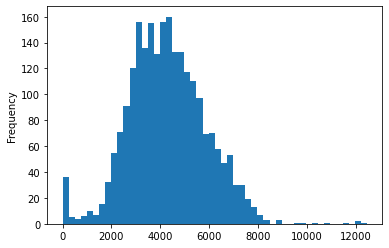

In [29]:
# plot it as a historgram with 50 bins
gdf['Total'].plot.hist(bins=50)

<div class="alert alert-info">
    Now it's your turn. Find some stats for different fields in the data and output them below.
    </div>

<AxesSubplot:ylabel='Frequency'>

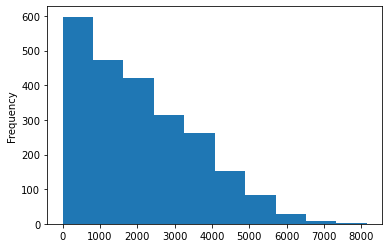

In [33]:
gdf['Hispanic'].plot.hist()

## Sorting
What are the top 10 most populated census tracts? What are the census tracts with the highest black popluation? To answer these questions, the simplest method is to sort the data by their respective columns.

In [49]:
gdf_sorted = gdf.sort_values(by='Total',ascending = False)

In [50]:
# display the data, but just a few columns to keep it clean
gdf_sorted[['geoid','Total']].head(10)

,geoid,Total
2198,14000US06037901004,12463.0
923,14000US06037275602,12100.0
848,14000US06037265301,11977.0
2236,14000US06037910705,11613.0
2206,14000US06037901205,10783.0
2275,14000US06037920037,10318.0
2147,14000US06037702901,9852.0
994,14000US06037300600,9609.0
532,14000US06037206020,8947.0
2192,14000US06037900803,8751.0


<AxesSubplot:>

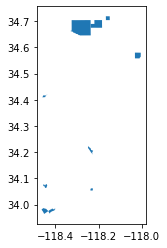

In [51]:
# plot it
gdf_sorted.head(10).plot()

<AxesSubplot:>

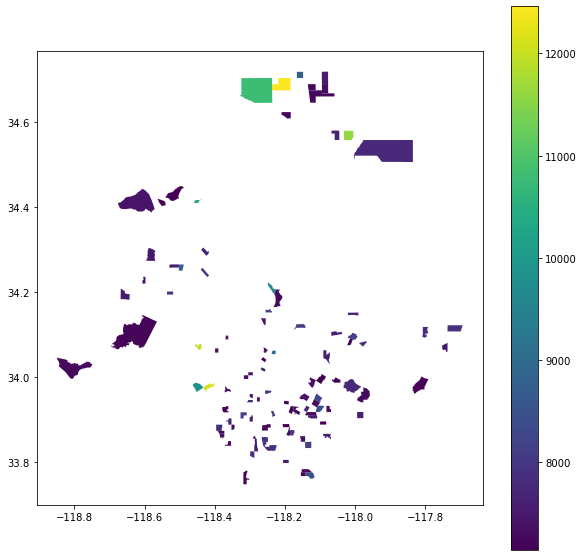

In [52]:
# Make it prettier
gdf_sorted.head(100).plot(figsize=(10,10),column='Total',legend=True)

<div class="alert alert-info">
    Now it's your turn! Create a table and accompanying bar plot for the top/bottom x values for column of your choice.
    
    
When you are done, post your map to the <a href="https://docs.google.com/document/d/1FjLOg2SBYaUn-k5mzk_WL5SgcL7neLg3vkmSRC_37-8/edit?usp=sharing" target="_blank">class gallery</a> (right click the image, copy, and paste)

</div>

<AxesSubplot:>

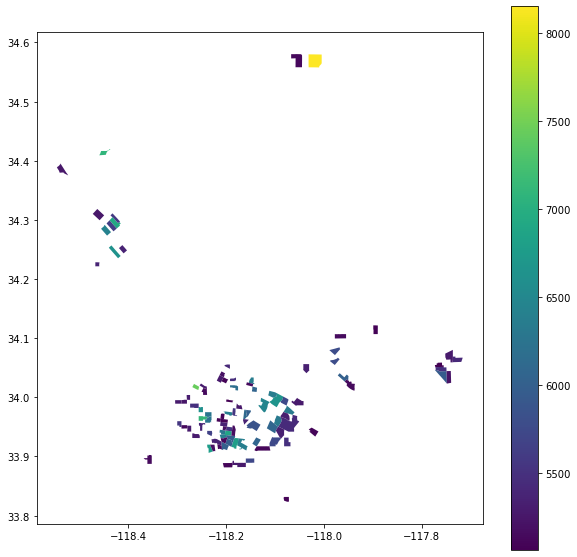

In [56]:
gdf_sorted = gdf.sort_values(by='Hispanic',ascending = False)
gdf_sorted.head(100).plot(figsize=(10,10),column='Hispanic',legend=True)

## Filtering and subsetting data
Sorting is one method, but the process of discovery compels us to interrogate the data in different ways. One method of doing so is to query, or filter the data to see specific views of the data based on a question you may have. For example, what are the census tracts that have no people in them? Or, Which census tracts are more than 75% black?

In [57]:
# subset the data so that we can see the data per row... 
# in other words, this syntax is asking to "show me the values in my dataframe that match this filter
gdf[gdf['Total']==0]

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
1055,14000US06037320000,"Census Tract 3200, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.36215 34.13903, -118.3612..."
2318,14000US06037980001,"Census Tract 9800.01, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.37031 34.20120, -118.3658..."
2319,14000US06037980002,"Census Tract 9800.02, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.25753 33.80197, -118.2571..."
2320,14000US06037980003,"Census Tract 9800.03, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.14019 34.78468, -118.1401..."
2321,14000US06037980004,"Census Tract 9800.04, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.12795 34.64591, -118.1274..."
2322,14000US06037980005,"Census Tract 9800.05, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.35210 33.85818, -118.3517..."
2323,14000US06037980006,"Census Tract 9800.06, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.09420 33.78670, -118.0941..."
2324,14000US06037980007,"Census Tract 9800.07, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.11512 33.76305, -118.1135..."
2328,14000US06037980013,"Census Tract 9800.13, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.39627 33.92804, -118.3962..."
2331,14000US06037980018,"Census Tract 9800.18, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.18066 33.80597, -118.1806..."


Note that unless you specify the resulting output as a new variable, the results are only temporary (in memory). If you want to use the results for subsequent analysis, you need to create a new variable.

In [58]:
# create a new variable for census tracts with zero pop
gdf_no_pop = gdf[gdf['Total']==0]

In [59]:
# how many records?
print('There are ' + str(len(gdf_no_pop)) + ' census tracts with no people in them')

There are 19 census tracts with no people in them


In [60]:
# display it
gdf_no_pop[['geoid','Total']]

,geoid,Total
1055,14000US06037320000,0.0
2318,14000US06037980001,0.0
2319,14000US06037980002,0.0
2320,14000US06037980003,0.0
2321,14000US06037980004,0.0
2322,14000US06037980005,0.0
2323,14000US06037980006,0.0
2324,14000US06037980007,0.0
2328,14000US06037980013,0.0
2331,14000US06037980018,0.0


## Totals are great but let's normalize the data

For almost any data inquiry, you should ask the question: should I normalize the data? With raw numbers, is it fair to compare one census tract to another? For example, if one census tract has 1000 hispanics, and another has 100, can we assume that the first tract is largely Hispanic? No, because the total population might be 10000 people, resulting in it being 10% hispanic, whereas the second tract might have 200 people living in it, resulting in it being 50% hispanic.

To avoid these types of misrepresentations, we can normalize the data, and provide it as a percent of total.

In [61]:
# output columns
list(gdf)

['geoid',
 'name',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry']

In [62]:
# create a new column, and populate it with normalized data to get the percent of total value
gdf['Percent Non Hispanic'] = gdf['Non Hispanic']/gdf['Total']*100
gdf['Percent Hispanic'] = gdf['Hispanic']/gdf['Total']*100

In [63]:
gdf.sample(5)

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry,Percent Non Hispanic,Percent Hispanic
885,14000US06037270100,"Census Tract 2701, Los Angeles, CA",4202.0,3534.0,1536.0,452.0,78.0,1105.0,0.0,15.0,348.0,668.0,"MULTIPOLYGON (((-118.40356 34.02911, -118.4034...",84.102808,15.897192
256,14000US06037131701,"Census Tract 1317.01, Los Angeles, CA",5587.0,2756.0,1569.0,282.0,39.0,661.0,0.0,0.0,205.0,2831.0,"MULTIPOLYGON (((-118.56227 34.20835, -118.5612...",49.328799,50.671201
1538,14000US06037530700,"Census Tract 5307, Los Angeles, CA",2157.0,110.0,67.0,0.0,0.0,39.0,0.0,0.0,4.0,2047.0,"MULTIPOLYGON (((-118.19263 34.06176, -118.1925...",5.099675,94.900325
724,14000US06037229300,"Census Tract 2293, Los Angeles, CA",5715.0,708.0,43.0,553.0,25.0,0.0,7.0,13.0,67.0,5007.0,"MULTIPOLYGON (((-118.27397 34.00106, -118.2717...",12.388451,87.611549
1036,14000US06037310400,"Census Tract 3104, Los Angeles, CA",3247.0,2701.0,2034.0,41.0,27.0,404.0,0.0,126.0,69.0,546.0,"MULTIPOLYGON (((-118.35037 34.20667, -118.3499...",83.184478,16.815522


<div class="alert alert-info">
Now it's your turn!

Create new columns for 
- `Percent Non Hispanic White`
- `Percent Non Hispanic Black`
- `Percent Non Hispanic American Indian and Alaska Native`
- `Percent Non Hispanic Asian`
- `Percent Non Hispanic Native Hawaiian and Other Pacific Islander`
- `Percent Non Hispanic Some other race`
- `Percent Non Hispanic Two or more races`
    </div>

In [72]:
gdf['Percent Non Hispanic White'] = gdf['Non Hispanic White']/gdf['Total']*100
gdf['Percent Non Hispanic Black'] = gdf['Non Hispanic Black']/gdf['Total']*100
gdf['Percent Non Hispanic American Indian and Alaska Native'] = gdf['Non Hispanic American Indian and Alaska Native']/gdf['Total']*100
gdf['Percent Non Hispanic Asian'] = gdf['Non Hispanic Asian']/gdf['Total']*100
gdf['Percent Non Hispanic Native Hawaiian and Other Pacific Islander'] = gdf['Non Hispanic Native Hawaiian and Other Pacific Islander']/gdf['Total']*100
gdf['Percent Non Hispanic Some other race'] = gdf['Non Hispanic Some other race']/gdf['Total']*100
gdf['Percent Non Hispanic Two or more races'] = gdf['Non Hispanic Two or more races']/gdf['Total']*100

# Maps!

We can now create choropleth maps in geopandas. 

* [geopandas choropleth maps](https://geopandas.org/mapping.html#choropleth-maps)
* [color schemes with mapclassify](https://pysal.org/notebooks/viz/mapclassify/intro.html)
  * `natural_breaks`
  * `equal_interval`
  * `quantiles`
  * etc...

<AxesSubplot:>

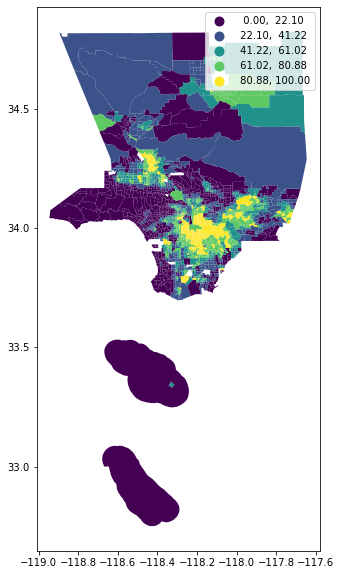

In [73]:
# The value passed into the `column` parameter specifies which column's values are plotted
gdf.plot(figsize=(12,10),
                 column='Percent Hispanic',
                 legend=True, 
                 scheme='NaturalBreaks')

<AxesSubplot:>

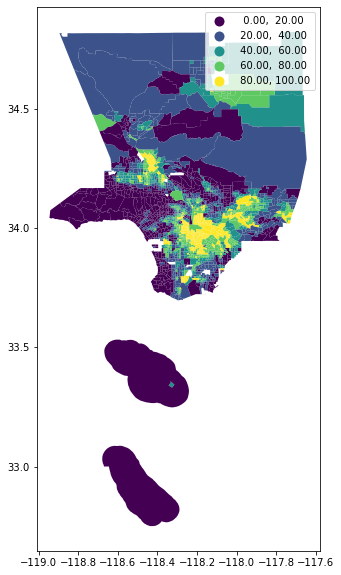

In [74]:
# Note the different scheme to make for equal breaks in the color legend.
gdf.plot(figsize=(12,10),
                 column='Percent Hispanic',
                 legend=True, 
                 scheme='equal_interval')

<AxesSubplot:>

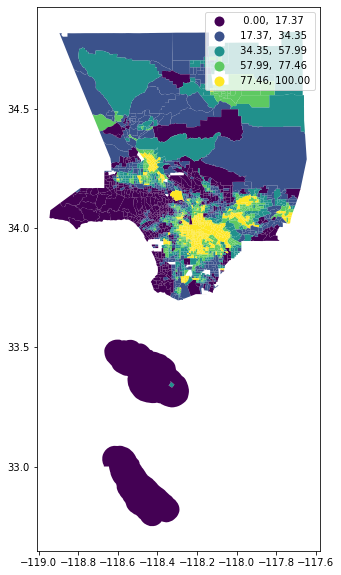

In [75]:
# And you can also plot different quartiles of the data
gdf.plot(figsize=(12,10),
                 column='Percent Hispanic',
                 legend=True, 
                 scheme='quantiles')

## Using subplots to create multiple plots

It is often useful to generate multiple plots next to each other. To do so, we look at matplotlib's `subplot` command:

- https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplots.html

Text(0.5, 1.0, 'Percent Non Hispanic Black')

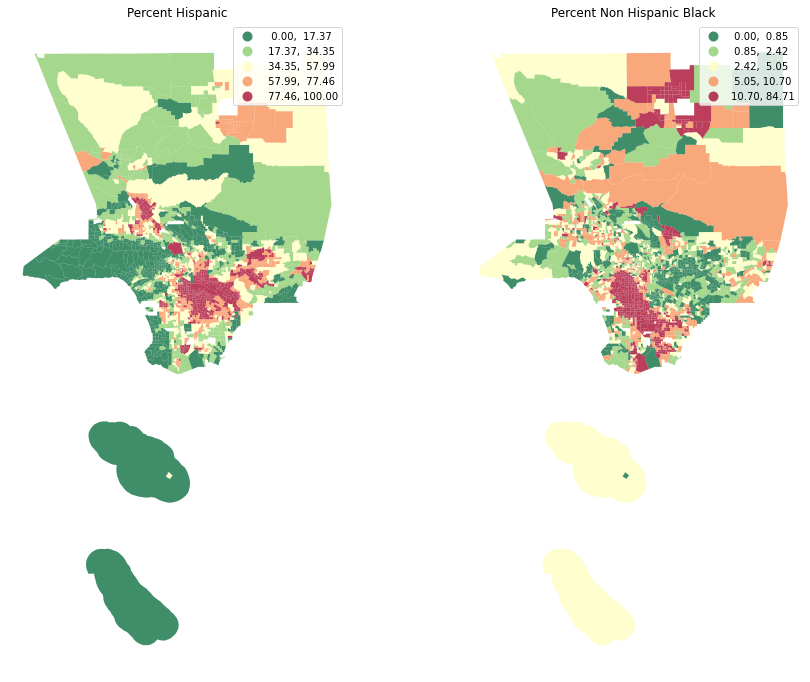

In [76]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

# regular count map on the left
gdf.plot(column='Percent Hispanic', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent Hispanic")

# spatial lag map on the right
gdf.plot(column='Percent Non Hispanic Black', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent Non Hispanic Black")

<div class="alert alert-info">

Now it's your turn! Create map plots based on other race indicators. Experiment with the different schemes to display variations of the same data, mapped differently.
    
When you are done, post your map to the <a href="https://docs.google.com/document/d/1FjLOg2SBYaUn-k5mzk_WL5SgcL7neLg3vkmSRC_37-8/edit?usp=sharing" target="_blank">class gallery</a> (right click the image, copy, and paste)

</div>

C:\Users\Anju\anaconda3\envs\Geopandas\lib\site-packages\mapclassify\classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
C:\Users\Anju\anaconda3\envs\Geopandas\lib\site-packages\mapclassify\classifiers.py:241: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)


Text(0.5, 1.0, 'Percent Non Hispanic Two or more races')

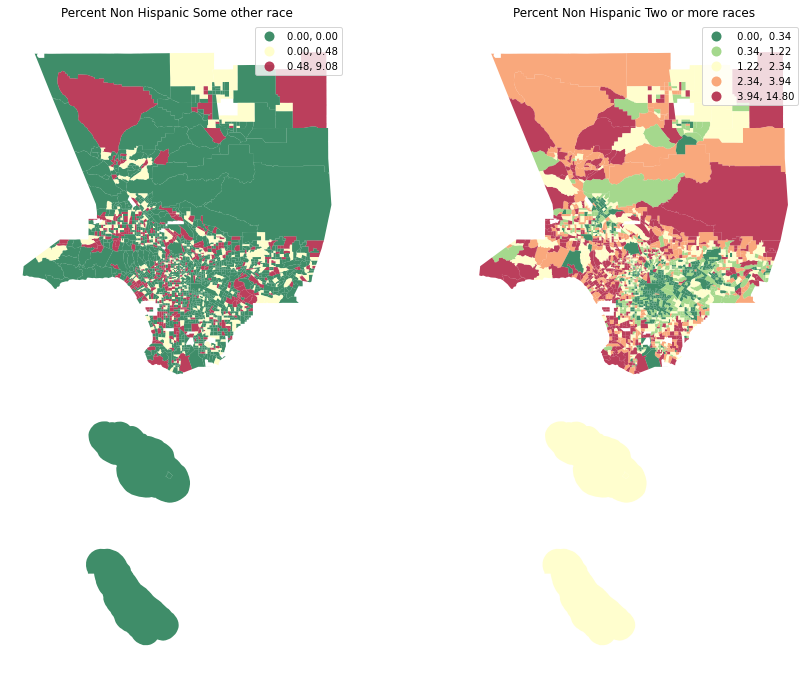

In [71]:

fig1, axss = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax3, ax4 = axss

# regular count map on the left
gdf.plot(column='Percent Non Hispanic Some other race', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax3, # this assigns the map to the subplot,
            legend=True
           )

ax3.axis("off")
ax3.set_title("Percent Non Hispanic Some other race")

# spatial lag map on the right
gdf.plot(column='Percent Non Hispanic Two or more races', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax4, # this assigns the map to the subplot
            legend=True
           )

ax4.axis("off")
ax4.set_title("Percent Non Hispanic Two or more races")

## Additional mapping ideas
What does the majority ethnic cluster look like in Los Angeles?

In [77]:
gdf[gdf['Percent Hispanic'] > 80]

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,...,geometry,Percent Non Hispanic,Percent Hispanic,Percent Non Hispanic White,Percent Non Hispanic Black,Percent Non Hispanic American Indian and Alaska Native,Percent Non Hispanic Asian,Percent Non Hispanic Native Hawaiian and Other Pacific Islander,Percent Non Hispanic Some other race,Percent Non Hispanic Two or more races
18,14000US06037104108,"Census Tract 1041.08, Los Angeles, CA",6001.0,1019.0,327.0,430.0,0.0,203.0,13.0,0.0,...,"MULTIPOLYGON (((-118.40853 34.27071, -118.4065...",16.980503,83.019497,5.449092,7.165472,0.000000,3.382770,0.216631,0.000000,0.766539
20,14000US06037104201,"Census Tract 1042.01, Los Angeles, CA",4569.0,488.0,56.0,401.0,31.0,0.0,0.0,0.0,...,"MULTIPOLYGON (((-118.42402 34.28533, -118.4232...",10.680674,89.319326,1.225651,8.776538,0.678485,0.000000,0.000000,0.000000,0.000000
21,14000US06037104203,"Census Tract 1042.03, Los Angeles, CA",5441.0,624.0,82.0,446.0,0.0,68.0,0.0,20.0,...,"MULTIPOLYGON (((-118.41799 34.27964, -118.4170...",11.468480,88.531520,1.507076,8.197023,0.000000,1.249770,0.000000,0.367579,0.147032
23,14000US06037104310,"Census Tract 1043.10, Los Angeles, CA",4962.0,218.0,68.0,96.0,8.0,18.0,0.0,17.0,...,"MULTIPOLYGON (((-118.44011 34.26727, -118.4399...",4.393390,95.606610,1.370415,1.934704,0.161225,0.362757,0.000000,0.342604,0.221685
24,14000US06037104320,"Census Tract 1043.20, Los Angeles, CA",5292.0,574.0,139.0,244.0,2.0,58.0,0.0,65.0,...,"MULTIPOLYGON (((-118.42876 34.27236, -118.4285...",10.846561,89.153439,2.626606,4.610733,0.037793,1.095994,0.000000,1.228269,1.247166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977,14000US06037601802,"Census Tract 6018.02, Los Angeles, CA",3945.0,378.0,109.0,141.0,8.0,120.0,0.0,0.0,...,"MULTIPOLYGON (((-118.35696 33.94183, -118.3566...",9.581749,90.418251,2.762991,3.574144,0.202788,3.041825,0.000000,0.000000,0.000000
1978,14000US06037601900,"Census Tract 6019, Los Angeles, CA",4847.0,737.0,33.0,617.0,41.0,9.0,0.0,0.0,...,"MULTIPOLYGON (((-118.34391 33.94545, -118.3434...",15.205282,84.794718,0.680834,12.729523,0.845884,0.185682,0.000000,0.000000,0.763359
1980,14000US06037602003,"Census Tract 6020.03, Los Angeles, CA",4760.0,620.0,75.0,455.0,0.0,61.0,0.0,11.0,...,"MULTIPOLYGON (((-118.34390 33.93581, -118.3439...",13.025210,86.974790,1.575630,9.558824,0.000000,1.281513,0.000000,0.231092,0.378151
2225,14000US06037910403,"Census Tract 9104.03, Los Angeles, CA",2278.0,311.0,92.0,131.0,0.0,33.0,3.0,41.0,...,"MULTIPOLYGON (((-118.13353 34.58122, -118.1331...",13.652327,86.347673,4.038630,5.750658,0.000000,1.448639,0.131694,1.799824,0.482880


<AxesSubplot:>

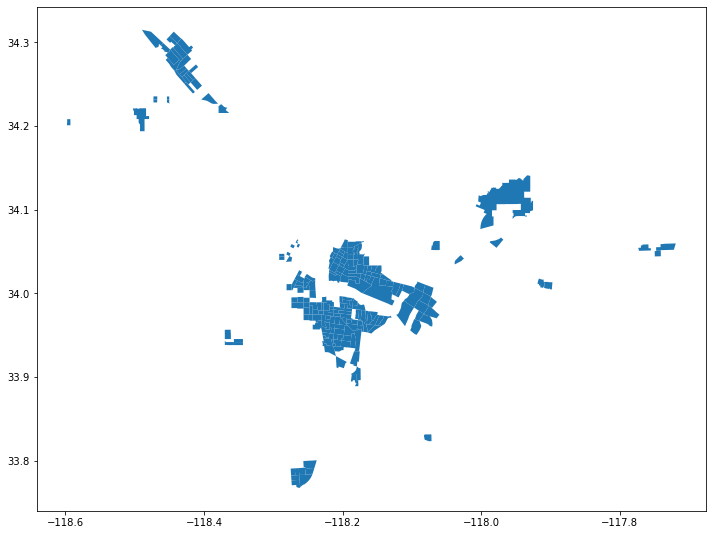

In [78]:
gdf[gdf['Percent Hispanic'] > 90].plot(figsize=(12,10))

<div class="alert alert-info">

Now it's your turn! Create map plots based on other race indicators with varying segments of the population.

When you are done, post your map to the <a href="https://docs.google.com/document/d/1FjLOg2SBYaUn-k5mzk_WL5SgcL7neLg3vkmSRC_37-8/edit?usp=sharing" target="_blank">class gallery</a> (right click the image, copy, and paste)

</div>

<AxesSubplot:>

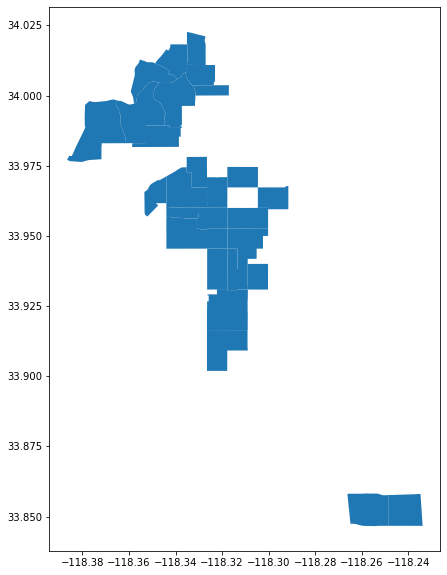

In [81]:
gdf[gdf['Percent Non Hispanic Black'] > 60].plot(figsize=(12,10))

## Add a basemap

Adding a basemap to a geopandas plot can be done using the [contextily library](https://contextily.readthedocs.io/en/latest/intro_guide.html). To do so, you must:

* reproject your geodataframe to Web Mercator (epsg: 3857)
* add a basemap, use the following [guidelines](https://github.com/geopandas/contextily/blob/master/notebooks/providers_deepdive.ipynb)

In [82]:
# reproject to Web Mercator
gdf_web_mercator = gdf.to_crs(epsg=3857)

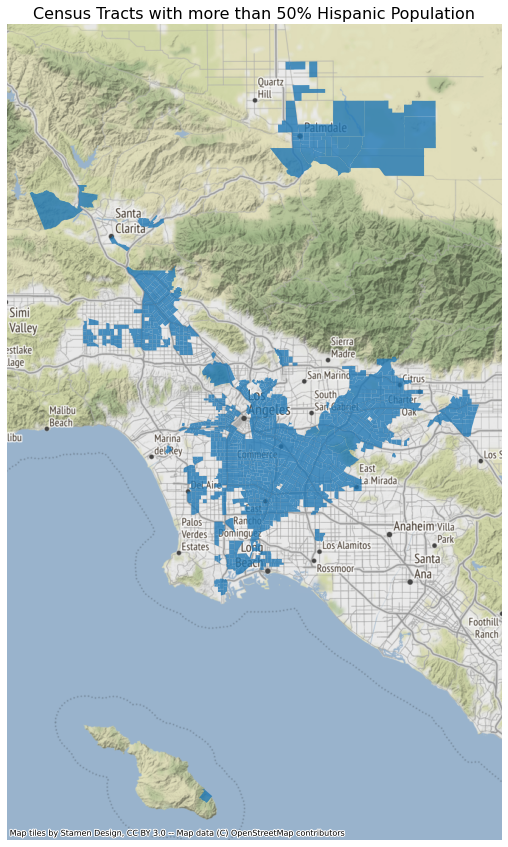

In [83]:
# use subplots that make it easier to create multiple layered maps
fig, ax = plt.subplots(figsize=(15, 15))

# add the layer with ax=ax in the argument 
gdf_web_mercator[gdf_web_mercator['Percent Hispanic'] > 50].plot(ax=ax, alpha=0.8)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Census Tracts with more than 50% Hispanic Population',fontsize=16)

# add a basemap
ctx.add_basemap(ax)

<div class="alert alert-info">

Now it's your turn! 

Add your final maps to the <a href="https://docs.google.com/document/d/1FjLOg2SBYaUn-k5mzk_WL5SgcL7neLg3vkmSRC_37-8/edit?usp=sharing" target="_blank">class gallery</a> (right click the image, copy, and paste)

</div>

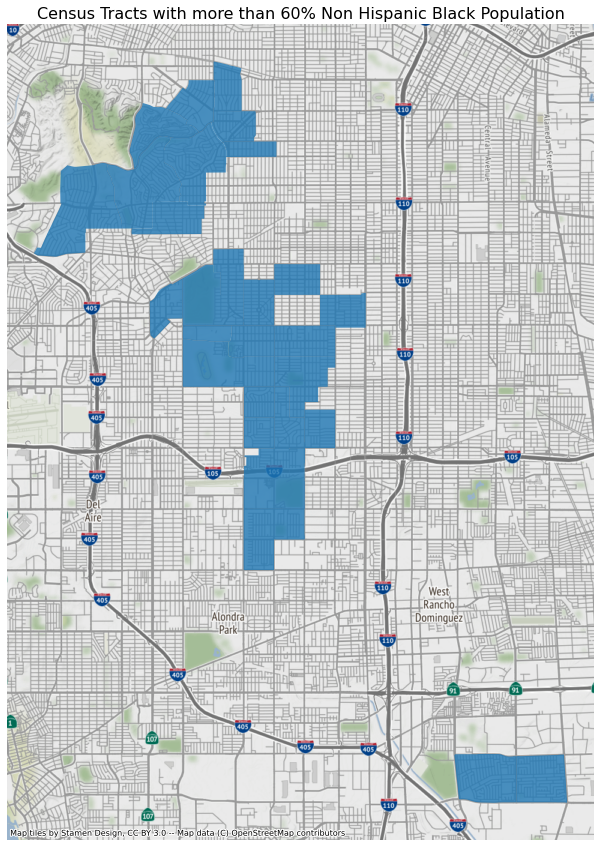

In [84]:
fig3, ax5 = plt.subplots(figsize=(15, 15))

# add the layer with ax=ax in the argument 
gdf_web_mercator[gdf_web_mercator['Percent Non Hispanic Black'] > 60].plot(ax=ax5, alpha=0.8)

# turn the axis off
ax5.axis('off')

# set a title
ax5.set_title('Census Tracts with more than 60% Non Hispanic Black Population',fontsize=16)

# add a basemap
ctx.add_basemap(ax5)